In [2]:
!pip install seaborn==0.11.1
!pip install wordcloud==1.8.1

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline

In [4]:
rs = 123
course_genre_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/course_genre.csv"
ratings_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/ratings.csv"

In [5]:
course_df = pd.read_csv(course_genre_url)
ratings_df = pd.read_csv(ratings_url)

In [6]:
course_df.columns

Index(['COURSE_ID', 'TITLE', 'Database', 'Python', 'CloudComputing',
       'DataAnalysis', 'Containers', 'MachineLearning', 'ComputerVision',
       'DataScience', 'BigData', 'Chatbot', 'R', 'BackendDev', 'FrontendDev',
       'Blockchain'],
      dtype='object')

In [7]:
course_df.shape[0]

307

In [8]:
course_df.head()

,COURSE_ID,TITLE,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
0,ML0201EN,robots are coming build iot apps with watson ...,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,ML0122EN,accelerating deep learning with gpu,0,1,0,0,0,1,0,1,0,0,0,0,0,0
2,GPXX0ZG0EN,consuming restful services using the reactive ...,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,RP0105EN,analyzing big data in r using apache spark,1,0,0,1,0,0,0,0,1,0,1,0,0,0
4,GPXX0Z2PEN,containerizing packaging and running a sprin...,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [9]:
course_df.dtypes

COURSE_ID          object
TITLE              object
Database            int64
Python              int64
CloudComputing      int64
DataAnalysis        int64
Containers          int64
MachineLearning     int64
ComputerVision      int64
DataScience         int64
BigData             int64
Chatbot             int64
R                   int64
BackendDev          int64
FrontendDev         int64
Blockchain          int64
dtype: object

In [10]:
course_df.iloc[1, ]

COURSE_ID                                     ML0122EN
TITLE              accelerating deep learning with gpu
Database                                             0
Python                                               1
CloudComputing                                       0
DataAnalysis                                         0
Containers                                           0
MachineLearning                                      1
ComputerVision                                       0
DataScience                                          1
BigData                                              0
Chatbot                                              0
R                                                    0
BackendDev                                           0
FrontendDev                                          0
Blockchain                                           0
Name: 1, dtype: object

In [11]:
titles = " ".join(title for title in course_df['TITLE'].astype(str))

In [12]:
stopwords = set(STOPWORDS)
stopwords.update(["getting started", "using", "enabling", "template","university", "end", "introduction", "basic"])

In [13]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800,height=400)

In [14]:
wordcloud.generate(titles)

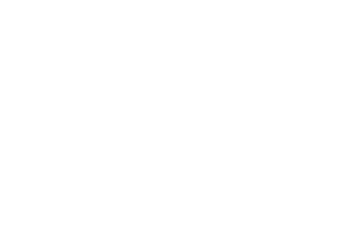

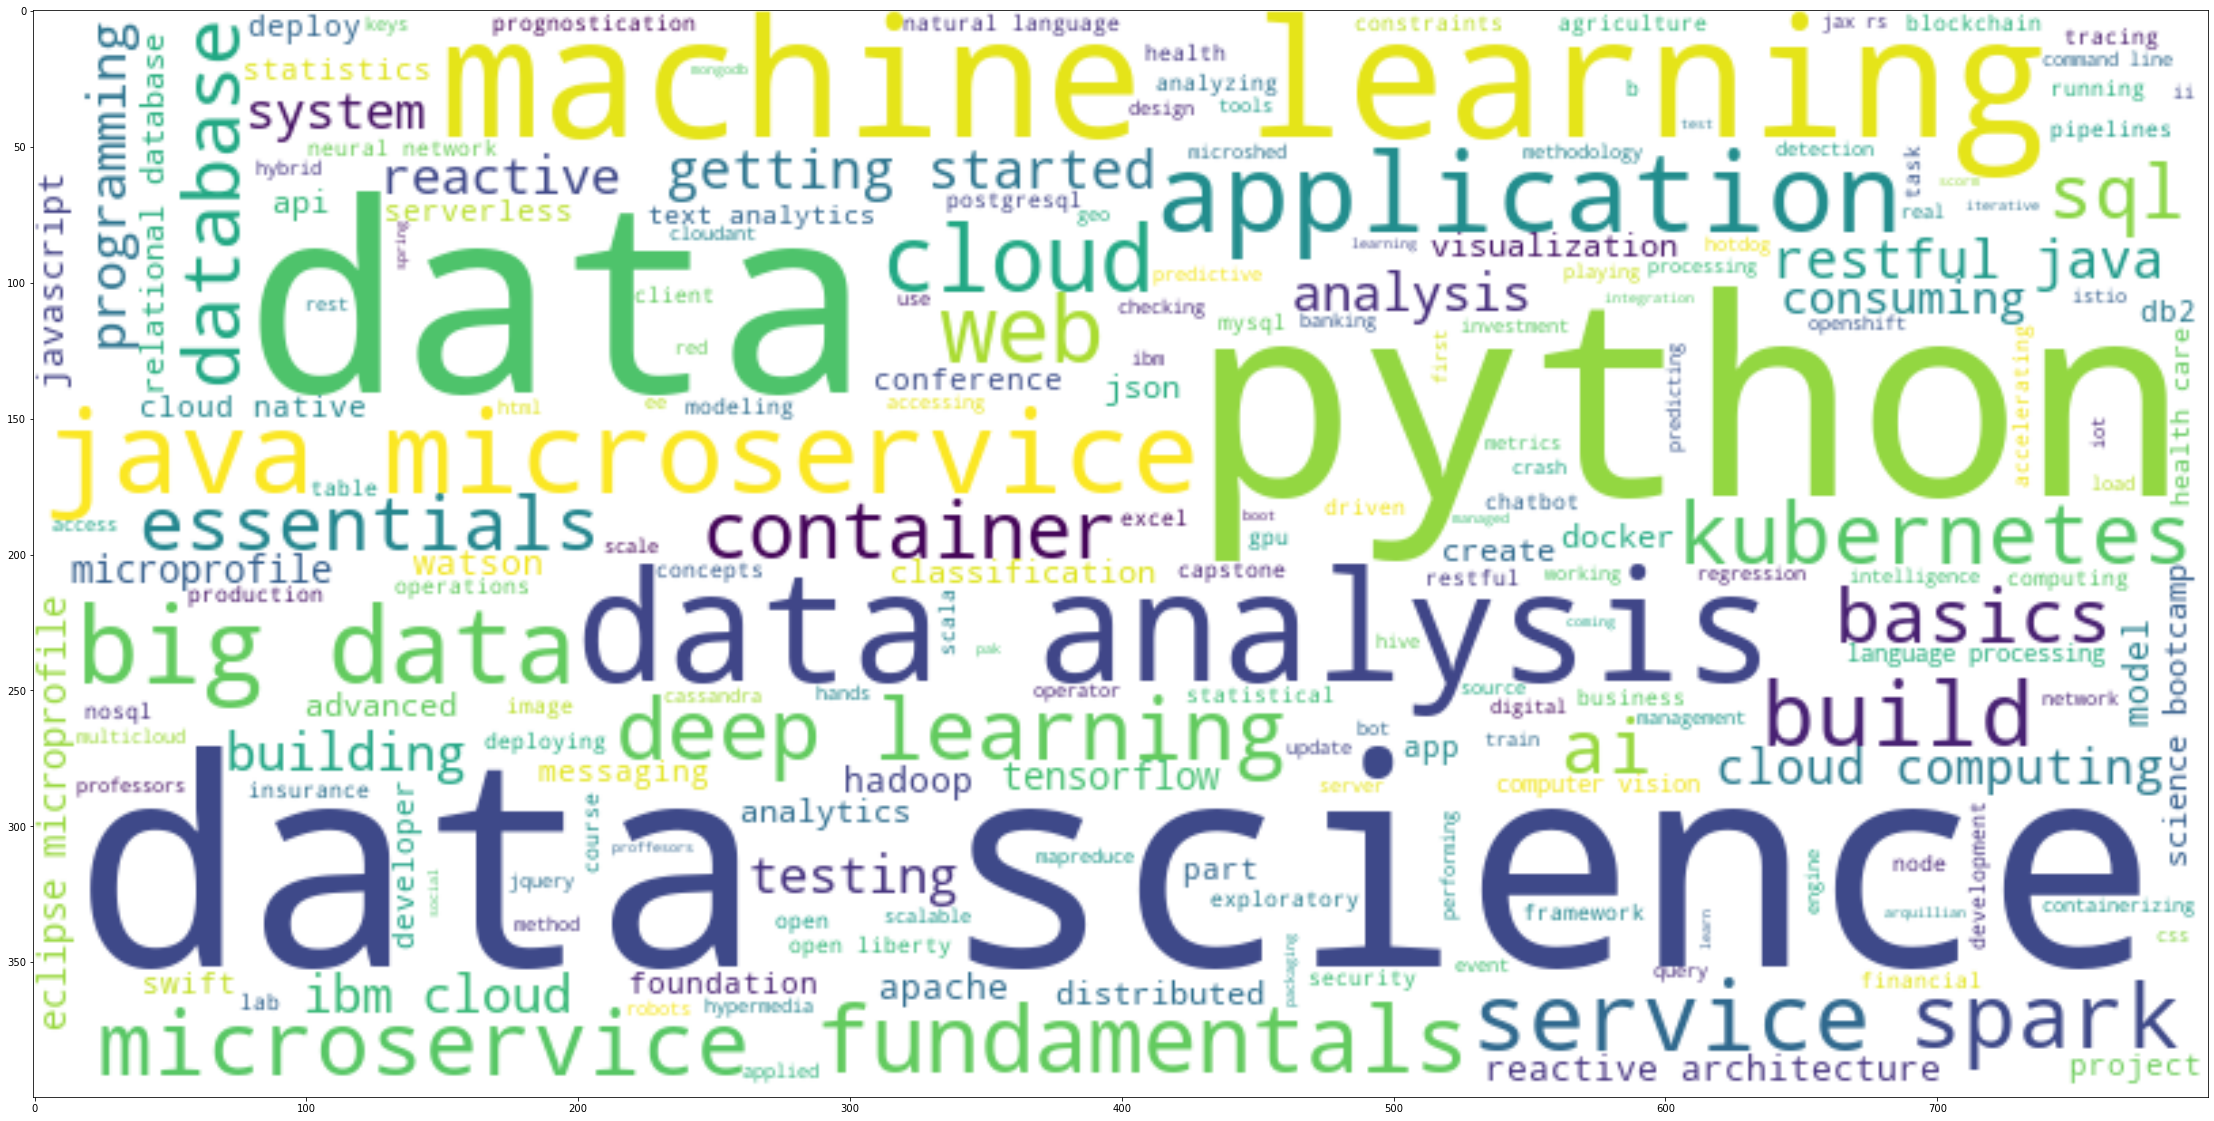

In [15]:
plt.axis("off")
plt.figure(figsize=(40,20))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')

In [16]:
course_ml_bd_df = course_df.loc[(course_df['MachineLearning'] == 1)&(course_df['BigData'] == 1)]
course_ml_bd_df

,COURSE_ID,TITLE,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
46,GPXX0BUBEN,insurance risk assessment with montecarlo meth...,0,0,0,0,0,1,0,0,1,0,0,0,0,0
59,TA0106EN,text analytics at scale,0,0,0,0,0,1,0,1,1,0,0,0,0,0
184,BD0221EN,spark mllib,0,0,0,0,0,1,0,0,1,0,0,0,0,0
282,excourse69,machine learning with big data,0,0,0,0,0,1,0,0,1,0,0,0,0,0


In [17]:
x = pd.DataFrame(course_df.sum()).iloc[2:, : ].reset_index().rename(columns={'index': 'Skills', 0: 'count'}).sort_values(by='count',ascending=False)
x

,Skills,count
11,BackendDev,78
5,MachineLearning,69
0,Database,60
3,DataAnalysis,56
7,DataScience,38
2,CloudComputing,37
8,BigData,36
1,Python,28
12,FrontendDev,19
4,Containers,17


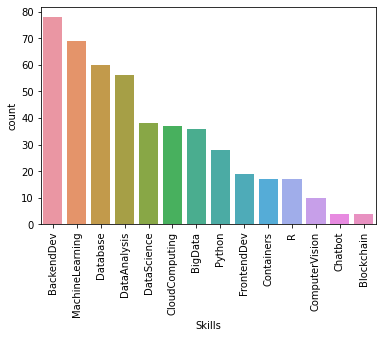

In [18]:
sns.barplot(data=x, x="Skills", y="count")
plt.xticks(rotation=90)
plt.show()

In [19]:
ratings_df.head()

,user,item,rating
0,1889878,CC0101EN,3.0
1,1342067,CL0101EN,3.0
2,1990814,ML0120ENv3,3.0
3,380098,BD0211EN,3.0
4,779563,DS0101EN,3.0


In [20]:
ratings_df['rating'].describe()

count    233306.000000
mean          2.952954
std           0.211737
min           2.000000
25%           3.000000
50%           3.000000
75%           3.000000
max           3.000000
Name: rating, dtype: float64

In [21]:
user_count_df = ratings_df.groupby('user').size()
user_count_df

user
2          61
4          44
5          59
7           1
8           3
           ..
2102054     8
2102356     1
2102680    11
2102983     1
2103039     1
Length: 33901, dtype: int64

In [22]:
user_count_df.describe()

count    33901.000000
mean         6.881980
std          5.823548
min          1.000000
25%          2.000000
50%          6.000000
75%          9.000000
max         61.000000
dtype: float64

<AxesSubplot:>

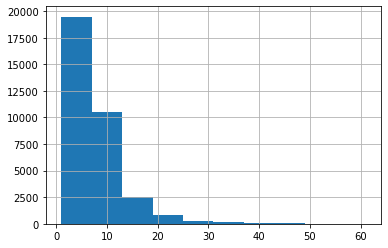

In [23]:
user_count_df.hist()

In [24]:
item_count_df = ratings_df.groupby('item').size()
item_count_df

item
AI0111EN       383
BC0101EN      6719
BC0201EN      2866
BC0202EN       775
BD0101EN     13291
             ...  
TMP0105EN      347
TMP0106         35
TMP107           2
WA0101EN      2247
WA0103EN        56
Length: 126, dtype: int64

In [25]:
course_count_df = pd.DataFrame(item_count_df.sort_values()[-20:]).reset_index().rename(columns={'item': 'COURSE_ID', 0: 'count'})
course_count_df

,COURSE_ID,count
0,DS0301EN,3624
1,BD0115EN,3670
2,DB0101EN,3697
3,CO0101EN,4480
4,CC0101EN,4983
5,ST0101EN,5015
6,RP0101EN,5237
7,CB0103EN,5512
8,ML0115EN,6323
9,DV0101EN,6709


In [26]:
pd.merge(course_count_df, course_df[['COURSE_ID','TITLE']],on='COURSE_ID',how='left')

,COURSE_ID,count,TITLE
0,DS0301EN,3624,data privacy fundamentals
1,BD0115EN,3670,mapreduce and yarn
2,DB0101EN,3697,sql and relational databases 101
3,CO0101EN,4480,docker essentials a developer introduction
4,CC0101EN,4983,introduction to cloud
5,ST0101EN,5015,statistics 101
6,RP0101EN,5237,r for data science
7,CB0103EN,5512,build your own chatbot
8,ML0115EN,6323,deep learning 101
9,DV0101EN,6709,data visualization with python


In [27]:
total = ratings_df.shape[0]
top = course_count_df['count'].sum()
print(f"Percentage of the top course enrollments {round((top * 100)/total,2)}%")

Percentage of the top course enrollments 63.3%


In [28]:
course_count_df

,COURSE_ID,count
0,DS0301EN,3624
1,BD0115EN,3670
2,DB0101EN,3697
3,CO0101EN,4480
4,CC0101EN,4983
5,ST0101EN,5015
6,RP0101EN,5237
7,CB0103EN,5512
8,ML0115EN,6323
9,DV0101EN,6709


In [30]:
merged_df = pd.merge(course_count_df, course_df[['COURSE_ID', 'TITLE']], on='COURSE_ID', how='left')
sorted_merged_df = merged_df.sort_values(by='count', ascending=False)
sorted_merged_df

,COURSE_ID,count,TITLE
19,PY0101EN,14936,python for data science
18,DS0101EN,14477,introduction to data science
17,BD0101EN,13291,big data 101
16,BD0111EN,10599,hadoop 101
15,DA0101EN,8303,data analysis with python
14,DS0103EN,7719,data science methodology
13,ML0101ENv3,7644,machine learning with python
12,BD0211EN,7551,spark fundamentals i
11,DS0105EN,7199,data science hands on with open source tools
10,BC0101EN,6719,blockchain essentials


In [4]:
import pandas as pd
course_genre_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/course_genre.csv"
course_df = pd.read_csv(course_genre_url)

In [5]:
course_df.columns

Index(['COURSE_ID', 'TITLE', 'Database', 'Python', 'CloudComputing',
       'DataAnalysis', 'Containers', 'MachineLearning', 'ComputerVision',
       'DataScience', 'BigData', 'Chatbot', 'R', 'BackendDev', 'FrontendDev',
       'Blockchain'],
      dtype='object')

In [7]:
courses = [
    ('ML0201EN', 'robots are coming  build iot apps with watson  swift  and node red'),
    ('ML0122EN', 'accelerating deep learning with gpu'),
    ('GPXX0ZG0EN', 'consuming restful services using the reactive jax rs client'),
    ('RP0105EN', 'analyzing big data in r using apache spark'),
    ('GPXX0Z2PEN', 'containerizing  packaging  and running a spring boot application'),
    ('CNSC02EN', 'cloud native security conference   data security'),
    ('DX0106EN', 'data science bootcamp with r for university proffesors'),
    ('GPXX0FTCEN', 'learn how to use docker containers for iterative development'),
    ('RAVSCTEST1', 'scorm test 1'),
    ('CC0271EN', 'cloud pak for integration essentials'),
    ('WA0103EN', 'watson analytics for social media'),
    ('DX0108EN', 'data science bootcamp with python for university professors  advance '),
    ('DAI101EN', 'data   ai essentials'),
    ('GPXX0QR3EN', 'enabling distributed tracing in microservices with zipkin'),
    ('BD0145EN', 'sql access for hadoop'),
    ('HCC105EN', 'hybrid cloud conference  ai pipelines lab'),
    ('DE0205EN', 'dataops methodology'),
    ('DS0132EN', 'data   ai  jumpstart your journey'),
    ('OS0101EN', 'introduction to open source'),
    ('DS0201EN', 'end to end data science on cloudpak for data'),
    ('BENTEST4', 'ai for everyone  master the basics'),
    ('CC0210EN', 'serverless computing using cloud functions   developer i'),
    ('PA0103EN', 'predicting customer satisfaction'),
    ('HCC104EN', 'hybrid cloud conference serverless lab'),
    ('TMP0105EN', 'getting started with the data  apache spark makers build'),
    ('PA0107EN', 'predicting financial performance of a company'),
    ('DB0113EN', 'db2 fundamentals i'),
    ('PA0109EN', 'using clustering methods for investment portfolio analysis'),
    ('PHPM002EN', 'php web application on a lamp stack'),
    ('RP0103', 'using r with databases'),
    ('RP0103EN', 'using r with databases'),
    ('BD0212EN', 'spark fundamentals ii'),
    ('SECM03EN', 'apply end to end security to a cloud application'),
    ('SC0103EN', 'spark overview for scala analytics'),
    ('RP0151EN', 'r 101'),
    ('TA0105', 'text analytics 101'),
    ('SW0201EN', 'how to build watson ai and swift apis and make money'),
    ('TMP0106', 'data science bootcamp'),
    ('ST0201EN', 'statistics 201'),
    ('ST0301EN', 'statistics 301'),
    ('SW0101EN', 'build swift mobile apps with watson ai services'),
    ('TMP0101EN', 'text analysis'),
    ('DW0101EN', 'introduction to machine learning with sound'),
    ('BD0143EN', 'using hbase for real time access to your big data'),
    ('WA0101EN', 'watson analytics 101'),
    ('BD0141EN', 'accessing hadoop data using hive'),
    ('CO0401EN', 'beyond the basics  istio and ibm cloud kubernetes service'),
    ('ML0122ENv1', 'accelerating deep learning with gpu'),
    ('BD0151EN', 'text analytics 101'),
    ('TA0106EN', 'text analytics at scale'),
    ('TMP107', 'data science bootcamp with python'),
    ('ML0111EN', 'machine learning with apache systemml'),
    ('CO0201EN', 'container   kubernetes essentials with ibm cloud'),
    ('TA0105EN', 'text analytics 101'),
    ('PA0101EN', 'predictive modeling fundamentals i'),
    ('BC0202EN', 'build an iot blockchain network for a supply chain'),
    ('BC0101EN', 'blockchain essentials'),
    ('BC0201EN', 'ibm blockchain foundation developer'),
    ('BD0223EN', 'exploring spark s graphx'),
    ('AI0111EN', 'game playing ai with swift for tensorflow  s4tf '),
    ('BD0121EN', 'apache pig 101'),
    ('BD0135EN', 'developing distributed applications using zookeeper'),
    ('BD0133EN', 'controlling hadoop jobs using oozie'),
    ('BD0131EN', 'moving data into hadoop'),
    ('BD0115EN', 'mapreduce and yarn'),
    ('BD0211EN', 'spark fundamentals i'),
    ('ST0101EN', 'statistics 101'),
    ('BD0153EN', 'analyzing big data with a spreadsheet ui'),
    ('DP0101EN', 'openrefine 101'),
    ('BD0137EN', 'solr 101'),
    ('ML0120EN', 'deep learning with tensorflow'),
    ('CB0201EN', 'build chatbots with watson assistant'),
    ('CB0105ENv1', 'node red  basics to bots'),
    ('CL0101EN', 'ibm cloud essentials'),
    ('CO0301EN', 'getting started with microservices with istio and ibm cloud kubernetes service'),
    ('DA0201EN', 'data analysis demos'),
    ('DJ0101EN', 'data journalism  first steps  skills and tools'),
    ('CP0101EN', 'mathematical optimization for business problems'),
    ('DB0111EN', 'db2 academic training'),
    ('DB0115EN', 'db2 fundamentals ii'),
    ('COM001EN', 'scalable web applications on kubernetes'),
    ('DA0151EN', 'data analysis using r 101'),
    ('DB0151EN', 'nosql and dbaas 101'),
    ('GPXX0T0FEN', 'project  deploy a serverless app for image processing'),
    ('DS0107', 'data science career talks'),
    ('DS0110EN', 'data science with open data'),
    ('DX0107EN', 'data science bootcamp with python for university professors'),
    ('DS0321EN', 'bitcoin 101'),
    ('DS0105EN', 'data science hands on with open source tools'),
    ('DS0103EN', 'data science methodology'),
    ('LB0109ENv1', 'reactive architecture  distributed messaging patterns'),
    ('LB0111EN', 'reactive architecture  cqrs   event sourcing'),
    ('ML0115EN', 'deep learning 101'),
    ('LB0105ENv1', 'reactive architecture  reactive microservices'),
    ('LB0103ENv1', 'reactive architecture  domain driven design'),
    ('IT0101EN', 'building robots with tjbot'),
    ('CC0250EN', 'building cloud native and multicloud applications'),
    ('BD0101EN', 'big data 101'),
    ('EE0101EN', 'modernizing java ee applications'),
    ('CO0101EN', 'docker essentials  a developer introduction'),
    ('ML0122ENv3', 'accelerating deep learning with gpus'),
    ('LB0107ENv1', 'reactive architecture  building scalable systems'),
    ('CB0101EN', 'build your own chatbots'),
    ('ML0101EN', 'machine learning with python'),
    ('CB0103EN', 'build your own chatbot'),
    ('ML0109EN', 'machine learning   dimensionality reduction'),
    ('ML0101ENv3', 'machine learning with python'),
    ('DA0101EN', 'data analysis with python'),
    ('SC0101EN', 'scala 101'),
    ('CO0193EN', 'hybrid cloud conference   backend services for containers'),
    ('DS0101EN', 'introduction to data science'),
    ('LB0101ENv1', 'reactive architecture  introduction to reactive systems'),
    ('DS0301EN', 'data privacy fundamentals'),
    ('BD0111EN', 'hadoop 101'),
    ('CC0101EN', 'introduction to cloud'),
    ('BD0221EN', 'spark mllib'),
    ('CC0103EN', 'ibm cloud essentials   v3'),
    ('PY0101EN', 'python for data science'),
    ('CC0201EN', 'introduction to containers  kubernetes  and openshift v2'),
    ('BD0123EN', 'simplifying data pipelines with apache kafka'),
    ('DB0101EN', 'sql and relational databases 101'),
    ('DV0151EN', 'data visualization with r'),
    ('DV0101EN', 'data visualization with python'),
    ('ML0103EN', 'digital analytics   regression'),
    ('ML0151EN', 'machine learning with r'),
    ('ML0120ENv2', 'deep learning with tensorflow'),
    ('RP0101EN', 'r for data science'),
    ('CC0150EN', 'building cloud native and multicloud applications'),
    ('ML0120ENv3', 'deep learning with tensorflow'),
    ('SC0105EN', 'data science with scala'),
    ('excourse40', 'exploratory data analysis for machine learning'),
    ('excourse46', 'machine learning'),
    ('excourse47', 'machine learning for all'),
    ('excourse52', 'machine learning data lifecycle in production'),
    ('excourse53', 'deploying machine learning models in production'),
    ('excourse54', 'exploratory data analysis for machine learning'),
    ('excourse69', 'machine learning with big data'),
    ('excourse77', 'natural language processing with attention models'),
    ('excourse84', 'using r for regression and machine learning in investment ')
]

In [8]:
courses_by_genre = {genre: [] for genre in course_df.columns[2:]}
for course in courses:
    course_id, title = course
    for genre in courses_by_genre.keys():
        if course_df.loc[course_df['COURSE_ID'] == course_id, genre].values[0] == 1:
            courses_by_genre[genre].append((course_id, title))

In [9]:
courses_by_genre

{'Database': [('RP0105EN', 'analyzing big data in r using apache spark'),
  ('CC0271EN', 'cloud pak for integration essentials'),
  ('BD0145EN', 'sql access for hadoop'),
  ('DE0205EN', 'dataops methodology'),
  ('TMP0105EN', 'getting started with the data  apache spark makers build'),
  ('DB0113EN', 'db2 fundamentals i'),
  ('RP0103', 'using r with databases'),
  ('RP0103EN', 'using r with databases'),
  ('BD0212EN', 'spark fundamentals ii'),
  ('SC0103EN', 'spark overview for scala analytics'),
  ('BD0143EN', 'using hbase for real time access to your big data'),
  ('BD0141EN', 'accessing hadoop data using hive'),
  ('BD0121EN', 'apache pig 101'),
  ('BD0135EN', 'developing distributed applications using zookeeper'),
  ('BD0131EN', 'moving data into hadoop'),
  ('BD0115EN', 'mapreduce and yarn'),
  ('BD0211EN', 'spark fundamentals i'),
  ('BD0137EN', 'solr 101'),
  ('DJ0101EN', 'data journalism  first steps  skills and tools'),
  ('DB0111EN', 'db2 academic training'),
  ('DB0115EN', '

In [12]:
len(courses_by_genre)

14

In [13]:
for genre, courses_list in courses_by_genre.items():
    num_tuples = len(courses_list)
    print(f"Number of courses in '{genre}': {num_tuples}")

Number of courses in 'Database': 27
Number of courses in 'Python': 8
Number of courses in 'CloudComputing': 19
Number of courses in 'DataAnalysis': 26
Number of courses in 'Containers': 8
Number of courses in 'MachineLearning': 39
Number of courses in 'ComputerVision': 1
Number of courses in 'DataScience': 22
Number of courses in 'BigData': 19
Number of courses in 'Chatbot': 3
Number of courses in 'R': 10
Number of courses in 'BackendDev': 33
Number of courses in 'FrontendDev': 7
Number of courses in 'Blockchain': 4
